# readDiag

The `readDiag` package was designed to be a tool that enables easy access to diagnostic files generated by the [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). The package is mainly composed of 2 classes, the first one for reading data (`read_diag`) and the other for creating different types of figures with selected data (`plot_diag`).

## The `read_diag` Class

The `read_diag` class consists of 5 functions:

1. `__init__(self, diagFile, diagFileAnl=None, isisList=None, zlevs=None)`: where `diagFile` is the diagnostic file of the first outer loop with OmF information, and `diagFileAnl` is the diagnostic file of the last outer loop with OmA information. Note that it is not necessary to inform both files; `diagFileAnl` is optional. In this case, the read information (Omf or OmA) will depend on the outer loop (diagnostic file) provided.
2. `overview(self)`: this function creates and returns a dictionary with the information in the file.
3. `pfileinfo(self)`: this function elegantly prints a list with the information in the file.
4. `close(self)`: this function closes the last opened file.
5. `tocsv(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", Level=None, Lay=None, SingleL=None)`: this function generates a CSV file of the OmF and OmA parameters with the following information: date, mean, standard deviation, and total data for the chosen variable and type.

The input data for the function and functionalities are identical to those of the `time_series` function presented in the next section in the `plot_diag` class (item 7 - see also details of functionalities [here](#time_series)). What distinguishes the two functions is that this one writes a CSV file, and the other generates time series figures.

## The `plot_diag` Class

The `plot_diag` class consists of 7 functions:

1. `plot(self, varName, varType, param, mask=None, **kwargs)`: the `plot` function generates a figure for the variable `varName` (e.g., `uv`), `varType` (e.g., `220` (dropssonda)), and `param`, which can be various options such as `param="obs"` for the observation value, `param="omf"` for observation minus background, or `param="oma"` for observation minus analysis. It is also possible to mask the data with the `iuse` variable, which indicates whether the data was (`iuse=1`) or was not (`iuse=-1` - monitored data) used in assimilation. Below is an example executed for `varName="uv"`, `varType=220`, `param="obs"`, and mask `iuse==1"`:

<img src=notefigs/uv_obs_plot.png style="width: 800px;">
<br>
    
2. `ptmap(self, varName, varType=None, mask=None, **kwargs)`: the `ptmap` function generates a figure with the location of all observations defined by `varName` (e.g., `uv`) and `varType` (can be a single type or a list, e.g., `[200]` or `[220,221,257]`). If `varType` is not informed, then all types will be included in the figure. It is also possible to mask the data with the `iuse` variable, which indicates whether the data was (`iuse=1`) or was not (`iuse=-1` - monitored data) used in assimilation. Below is an example executed for `varName="uv"`, `varType=[254,242,221,220,257,258,281,280]`, and `mask=None`;

<img src=notefigs/uv_254_242_221_220_257_258_281_280_ptmap.png style="width: 800px;">
<br>

3. `pvmap(self, varName=None, mask=None, **kwargs)`: the `pvmap` function is similar to the `ptmap` function, with the difference of not specifying the type (`varType`), so you can choose a list of variables, e.g., `["uv","ps","t"]`. Below is an example executed for `varName=['uv','ps','t']`, and `mask=None`; 

<img src=notefigs/uv_ps_t_pvmap.png style="width: 800px;">
<br>

4. `pcount(self,varName,**kwargs)`: the `pcount` function generates a histogram of the data quantity for a specific variable `varName` (e.g., `uv`) and all available types (`varType`);

<img src=notefigs/uv_pcount.png style="width: 800px;">
<br>

5. `kxcount(self,**kwargs)`: the `kxcount` function is similar to `pcount` but does not specify the variable (`varName`). This function generates a histogram with the total data (all variables summed) for all available types (`varType`);

<img src=notefigs/kxcount.png style="width: 800px;">
<br>

6. `vcount(self,**kwargs)`: the `vcount` function generates a histogram with the total quantity of data for each variable (`ps`, `t`, `q`, `uv`);

<img src=notefigs/vcount.png style="width: 800px;">
<br>

7. `time_series(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, Level=None, Lay=None, SingleL=None, Clean=None)`: the `time_series` function can generate 6 different types of figures, depending on the configuration specified in its call. The common feature among the 6 types is the time variation, while the difference between the 6 types is the way to treat the vertical levels. Basically, these ways are distributed between varying vertically (different values for different levels/layers) and fixed vertically (specific level, layer mean, or the entire atmosphere).

The input parameters for the function and each of the figure options will be explained in more detail below.

| Parameter       | Example                                  | Description
| :---            | :---:                                    | :---
| `self`          | `['/home/user/diag_conv_01.2019121000']` | List with all full paths (`path/file_name`) of each time in the time series.
| `varName`       | `uv`                                     | Variable name
| `varType`       | `220`                                    | Variable type
| `dateIni`       | `2019121000`                             | Initial date of the time series
| `dateFin`       | `2019121118`                             | Final date of the time series
| `nHour`         | `6`                                      | Time interval in hours between each file in the `self` list
| `vminOMA`       | `-2.0`                                   | Minimum value of the y-scale (ordinate) for OmF and OmA
| `vmaxOMA`       | `2.0`                                    | Maximum value of the y-scale (ordinate) for OmF and OmA
| `vminSTD`       | `0.0`                                    | Minimum value of the y-scale (ordinate) for the standard deviation
| `vmaxSTD`       | `14.0`                                   | Maximum value of the y-scale (ordinate) for the standard deviation
| `Level`         | `Zlevs`                                  | Value of the level to make the time series; options: numerical value corresponding to the level, e.g., 1000 for 1000 hPa; `Zlevs` to plot by layers (around the standard levels); `None` to plot all levels.
| `Lay`           | 25                                       | Half of the layer size (if `Level="Zlevs"`) in hPa if opting for layer sampling. If `Lay=None`, `Lay` will be internally calculated to fill the entire atmosphere containing the standard levels.
| `SingleL`       | `All`                                    | When `Level` is fixed, e.g., 1000 hPa, it will be considered exactly that level (using the option `SingleL=None`) or at all levels as a single layer (using `SingleL="All"`) or in a layer defined around the `Level` value ranging between `Level-Lay` and `Level+Lay`. If `Lay` is not informed, a default value of 50 hPa will be used.
| `Clean`         | `True` or `False`                        | If `True`, after generating and saving the figure, the figure window is restarted (`plt.clf()`) or closed (`plt.close()`); if `False`, this procedure is eliminated, and the figure remains available for viewing with `plt.show()`.

All figures generated with the option `Level` equal to `None` or `Zlevs` will contain the term `all_levels` in the name; otherwise, it will be `level` or `layer`, depending on the `SingleL` option.

Throughout this notebook, examples with code snippets are shown to illustrate the use of the functions listed above.

## Using the `read_diag` Class

### Required Libraries

To start using `readDiag`, first load the necessary libraries for its usage:

* `gsidiag`: it is the library that contains the `read_diag` and `plot_diag` classes;
* `pandas`: it is the library that provides tabulated data structures used by `readDiag`;
* `matplotlib`: it is the library from which figures are created;
* `datetime`: it is the library used for date manipulation.

The `%matplotlib inline` instruction is a Jupyter magic command and only adjusts the environment so that the `plt.show()` command is not needed whenever figures are displayed within the notebook. If you are using `readDiag` within a Python script, this directive can be omitted, and the `plt.show()` command should be used as needed.

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Main Variables

In the table below, the default values of the variables used throughout this tutorial are listed. Note that the variables have different types, and some can be declared as `None`.

| Variables |     | Values          | Type              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `uv`             | string            |
|`varType`  | =   | `220`            | integer           |
|`dateIni`  | =   | `2019121000`     | string            |
|`dateFin`  | =   | `2019121118`     | string            |
|`nHour`    | =   | `6`              | string            |
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`Level`    | =   | `1000`           | integer or `None` |
|`Lay`      | =   | `15`             | integer or `None` |
|`SingleL`  | =   | `OneL`           | string            |

Thus, in the following cell, the variables are adjusted according to the values in the table above. Additionally, the date values are also adjusted to compose the path and names of the GSI diagnostic files:

In [2]:
# For use in Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# For use in Itapemirim (Colorado, Ilopolis, and other virtual machines)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# For use on a local machine (in this case, the remote directory should be mounted locally with the sshfs command)
# Example:
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# or
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
DIRdiag = '/extra2/EGEON_EXP18_GSI_dataout'

varName = 'uv'
varType = 220
dateIni = '2019121000' 
dateFin = '2019121118' 
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2019121000', '2019121006', '2019121012', '2019121018', '2019121100', '2019121106', '2019121112', '2019121118']


Generating the `path` and `pathc` variables where the complete paths (including the file name) of the diagnostic files for the first (OmF) and last (OmA) outer loops will be:

In [3]:
paths, pathsc = [], []

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterL + '.' + dt) for dt in dates]

OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/extra2/EGEON_EXP18_GSI_dataout/2019121000/diag_conv_01.2019121000', '/extra2/EGEON_EXP18_GSI_dataout/2019121006/diag_conv_01.2019121006', '/extra2/EGEON_EXP18_GSI_dataout/2019121012/diag_conv_01.2019121012', '/extra2/EGEON_EXP18_GSI_dataout/2019121018/diag_conv_01.2019121018', '/extra2/EGEON_EXP18_GSI_dataout/2019121100/diag_conv_01.2019121100', '/extra2/EGEON_EXP18_GSI_dataout/2019121106/diag_conv_01.2019121106', '/extra2/EGEON_EXP18_GSI_dataout/2019121112/diag_conv_01.2019121112', '/extra2/EGEON_EXP18_GSI_dataout/2019121118/diag_conv_01.2019121118']

['/extra2/EGEON_EXP18_GSI_dataout/2019121000/diag_conv_03.2019121000', '/extra2/EGEON_EXP18_GSI_dataout/2019121006/diag_conv_03.2019121006', '/extra2/EGEON_EXP18_GSI_dataout/2019121012/diag_conv_03.2019121012', '/extra2/EGEON_EXP18_GSI_dataout/2019121018/diag_conv_03.2019121018', '/extra2/EGEON_EXP18_GSI_dataout/2019121100/diag_conv_03.2019121100', '/extra2/EGEON_EXP18_GSI_dataout/2019121106/diag_conv_03.2019121106', '/extra2/EGEON_EX

### Reading Diagnostic Files

**Note:** Reading diagnostic files using the values adjusted for the parameters above requires at least 8GB of RAM. If necessary, adjust the parameters to consider a smaller interval.

Reading diagnostic files with the `read_diag()` function from the `readDiag` package. In the following code snippet, note that the `read_diag()` function is used within a loop that iterates over all the files in the `paths` and `pathsc` lists defined in the previous step. At the end of the loop, the `gdf_list` list is generated, which will contain all the files read by `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Please wait; the estimated total time for reading the files is ' +
          str(int((float(len(paths))*20)/60)) + ' minutes and ' +
          str(int((float(len(paths))*20)%60)) + ' seconds.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Done!')    


Please wait; the estimated total time for reading the files is 2 minutes and 40 seconds.

Reading /extra2/EGEON_EXP18_GSI_dataout/2019121000/diag_conv_01.2019121000
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121006/diag_conv_01.2019121006
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121012/diag_conv_01.2019121012
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121018/diag_conv_01.2019121018
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121100/diag_conv_01.2019121100
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121106/diag_conv_01.2019121106
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121112/diag_conv_01.2019121112
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121118/diag_conv_01.2019121118
 
>>> GSI DIAG <<<
 
Done!


The `gdf_list` variable is a list of dataframes containing the data from each diagnostic file. To work with a single time, simply refer to the list with a fixed index, for example: `gdf_list[0]`:

In [5]:
gdf_list

Setting `tidx = 0` retrieves the first object from the `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtaining File Information

Use the `pfileinfo()` function to get a list of observations and their respective types (`kx`) contained within the file:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : ps
              └── kx => 181  120  187  180  183  

Variable Name : t
              └── kx => 181  120  187  180  183  130  126  

Variable Name : q
              └── kx => 181  120  187  180  183  

Variable Name : uv
              └── kx => 257  259  258  244  281  253  254  220  287  280  221  284  230  243  210  252  242  250  229  224  282  245  246  247  240  



In addition to the `pfileinfo()` method, other methods and functions can also be used to access information about the opened files. To get a list of available methods and functions, type `gdf_list[tidx].` and press the `<TAB>` key twice on the keyboard:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames
gdf_list[tidx].obs
```

The built-in methods and functions have documentation, which can be accessed as follows:

```python
print(object.function_name.__doc__)
```

or

```python
help(object.function_name)
```

For example:

In [8]:
print(gdf_list[tidx].pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


or alternatively:

In [9]:
help(gdf_list[tidx].pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



To get a dictionary with all the information about the variables and types contained in the file, use the `obsInfo` method:

In [10]:
gdf_list[tidx].obsInfo

{'ps':                   lat         lon    elev         prs     hgt  press   time  \
 kx  points                                                                    
 181 0      -72.000000    2.520000  1290.0  852.099976  1290.0  800.0    0.0   
     1      -70.760002   11.830000   123.0  987.700012   123.0  900.0    0.0   
     2      -72.000000    2.520000  1290.0  852.400024  1290.0  800.0   60.0   
     3      -72.000000    2.520000  1290.0  852.099976  1290.0  800.0  120.0   
     4      -72.000000    2.520000  1290.0  852.400024  1290.0  800.0  -60.0   
 ...               ...         ...     ...         ...     ...    ...    ...   
 183 3600    65.680000  341.929993    27.0  982.299988    27.0  900.0 -180.0   
     3601    63.779999  341.929993    38.0  977.599976    38.0  900.0 -180.0   
     3602    66.449997  344.049988    10.0  989.299988    10.0  900.0 -180.0   
     3603    63.779999  341.929993    38.0  972.599976    38.0  900.0    0.0   
     3604    66.449997  344.049988

To access a specific variable (e.g., `uv`), do the following:

In [11]:
print('Variable: ', varName)

gdf_list[tidx].obsInfo[varName]

Variable:  uv


lat         lon     elev    prs   hgt  press   time  idqc  \
kx  points                                                                    
257 0      -78.699997   14.860000  61068.0  487.0  30.0  400.0  -66.0   2.0   
    1      -78.769997   16.080000  60056.0  487.0  54.0  400.0  -66.0   2.0   
    2      -78.870003   16.120001  72079.0  500.0  37.0  500.0  -66.0   2.0   
    3      -80.500000   12.490000  80084.0  562.0  47.0  500.0  -66.0   2.0   
    4      -80.290001   13.620000  64059.0  512.0  56.0  500.0  -66.0   2.0   
...               ...         ...      ...    ...   ...    ...    ...   ...   
240 7107    13.980000  245.070007  74084.0  925.0  47.0  900.0  171.0   2.0   
    7108    13.690000  241.919998  79080.0  887.0  64.0  800.0  171.0   2.0   
    7109    13.710000  244.139999  57051.0  887.0  70.0  800.0  171.0   2.0   
    7110    13.520000  247.809998  56054.0  906.0  65.0  900.0  171.0   2.0   
    7111    13.510000  250.479996  80087.0  906.0  60.0  900.0  171.0   2.0   

            iuse  iusev  ...       inp_err       adj_err        inverr  \
kx  points               ...                                             
257 0       -1.0    0.0  ...  2.307337e-01  2.307337e-01  2.938736e-39   
    1       -1.0    0.0  ...  2.307337e-01  2.307337e-01  2.938736e-39   
    2       -1.0    0.0  ...  2.439024e-01  2.439024e-01  2.938736e-39   
    3       -1.0    0.0  ...  2.500000e-01  2.500000e-01  2.938736e-39   
    4       -1.0    0.0  ...  2.453386e-01  2.453386e-01  2.938736e-39   
...          ...    ...  ...           ...           ...           ...   
240 7107    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7108    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7109    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7110    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7111    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   

                     oer       obs       omf       oma           imp  \
kx  points                                                             
257 0                NaN -2.250000 -5.155063 -5.807309           NaN   
    1                NaN  0.934964 -2.355014 -2.984500           NaN   
    2                NaN  0.988129 -2.418580 -3.046497           NaN   
    3                NaN  3.983431  0.595628  0.257419           NaN   
    4                NaN  3.680218  0.498253  0.008589           NaN   
...                  ...       ...       ...       ...           ...   
240 7107    1.000000e+09 -7.203239 -0.806275 -0.955513  2.629265e-10   
    7108    1.000000e+09 -7.751757 -1.638531 -1.589939 -1.568761e-10   
    7109    1.000000e+09 -7.044833 -4.839164 -4.851346  1.180420e-10   
    7110    1.000000e+09 -7.018799 -2.621243 -2.872725  1.381637e-09   
    7111    1.000000e+09 -4.978588 -1.019387 -1.283688  6.087035e-10   

                     dfs                     geometry  
kx  points                                             
257 0                NaN   POINT (14.86000 -78.70000)  
    1                NaN   POINT (16.08000 -78.77000)  
    2                NaN   POINT (16.12000 -78.87000)  
    3                NaN   POINT (12.49001 -80.50000)  
    4                NaN   POINT (13.62000 -80.29000)  
...                  ...                          ...  
240 7107    1.203272e-10  POINT (-114.92999 13.98000)  
    7108   -7.961867e-11  POINT (-118.08002 13.69000)  
    7109    5.894722e-11  POINT (-115.85999 13.71000)  
    7110    6.591968e-10  POINT (-112.19000 13.52000)  
    7111    2.694244e-10  POINT (-109.52002 13.51000)  

[435598 rows x 21 columns]

To access specific variable and type (e.g., `uv` of type `220`), do:

In [12]:
print('Variable: ', varName, ' and Type: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType]

Variable:  uv  and Type:  220


,lat,lon,elev,prs,hgt,press,time,idqc,iuse,iusev,...,inp_err,adj_err,inverr,oer,obs,omf,oma,imp,dfs,geometry
points,,,,,,,,,,,,,,,,,,,,,
0,-33.980000,18.600000,52.0,1004.000000,1.000000e+11,1000.0,-45.000000,2.0,1.0,0.0,...,0.714286,0.553566,1.418077e-01,7.787335,-1.0,5.123084,2.253895,-2.717996,-1.887564,POINT (18.60001 -33.98000)
1,-33.979839,18.599819,52.0,1000.000000,1.000000e+11,1000.0,-44.880001,2.0,1.0,0.0,...,0.714286,0.553565,2.351083e-01,4.988861,-3.5,2.621643,-0.247218,-1.365421,-1.507585,POINT (18.59982 -33.97984)
2,-33.978512,18.598080,52.0,975.700012,3.000000e+02,900.0,-44.173199,2.0,1.0,0.0,...,0.714286,0.714286,7.142857e-01,1.400000,-4.0,9.577692,3.444868,-57.046478,-41.955929,POINT (18.59808 -33.97851)
3,-33.977551,18.596769,52.0,942.400024,6.000000e+02,900.0,-43.173000,2.0,-1.0,0.0,...,0.666667,0.652960,2.938736e-39,1.531486,0.0,16.411770,9.015676,-122.798218,-79.258301,POINT (18.59677 -33.97755)
4,-33.977921,18.596710,52.0,925.000000,1.000000e+11,900.0,-42.640198,2.0,-1.0,0.0,...,0.666667,0.619352,2.938736e-39,1.614591,-0.4,13.814748,6.904759,-88.673553,-59.123161,POINT (18.59671 -33.97792)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,75.934608,344.023560,14.0,8.200000,1.000000e+11,0.0,48.249001,2.0,1.0,0.0,...,0.476190,0.396825,3.968254e-01,2.520000,15.0,-3.926741,-4.877170,3.320431,1.480986,POINT (-15.97644 75.93461)
37462,75.892578,344.104126,14.0,7.400000,1.000000e+11,0.0,50.231998,2.0,1.0,0.0,...,0.476190,0.396825,3.968254e-01,2.520000,21.6,3.278691,2.275991,-2.210190,-1.304581,POINT (-15.89587 75.89258)
37463,75.865311,344.162476,14.0,6.900000,1.000000e+11,0.0,51.583801,2.0,1.0,0.0,...,0.476190,0.396825,3.968254e-01,2.520000,17.4,-0.492477,-1.526073,0.827923,0.201993,POINT (-15.83752 75.86531)


The `varType` parameter can also be a list, for example: `varType=[220, 221]`:

In [13]:
varTypes = [220,221]

print('Variable: ', varName, ' e Types: ', varTypes)

gdf_list[tidx].obsInfo[varName].loc[varTypes]

Variable:  uv  e Types:  [220, 221]


lat         lon   elev          prs           hgt   press  \
kx  points                                                                    
220 0      -33.980000   18.600000   52.0  1004.000000  1.000000e+11  1000.0   
    1      -33.979839   18.599819   52.0  1000.000000  1.000000e+11  1000.0   
    2      -33.978512   18.598080   52.0   975.700012  3.000000e+02   900.0   
    3      -33.977551   18.596769   52.0   942.400024  6.000000e+02   900.0   
    4      -33.977921   18.596710   52.0   925.000000  1.000000e+11   900.0   
...               ...         ...    ...          ...           ...     ...   
221 639      7.378550  352.432678  336.0   616.083801  4.200000e+03   600.0   
    640      7.382580  352.415344  336.0   551.021729  5.100000e+03   500.0   
    641      7.385930  352.406006  336.0   500.000000  1.000000e+11   500.0   
    642      7.386930  352.403564  336.0   510.839386  5.700000e+03   500.0   
    643      7.392140  352.394043  336.0   473.089569  6.300000e+03   400.0   

                 time  idqc  iuse  iusev  ...   inp_err   adj_err  \
kx  points                                ...                       
220 0      -45.000000   2.0   1.0    0.0  ...  0.714286  0.553566   
    1      -44.880001   2.0   1.0    0.0  ...  0.714286  0.553565   
    2      -44.173199   2.0   1.0    0.0  ...  0.714286  0.714286   
    3      -43.173000   2.0  -1.0    0.0  ...  0.666667  0.652960   
    4      -42.640198   2.0  -1.0    0.0  ...  0.666667  0.619352   
...               ...   ...   ...    ...  ...       ...       ...   
221 639    -32.119801   2.0   1.0    0.0  ...  0.526316  0.526316   
    640    -29.119799   2.0   1.0    0.0  ...  0.500000  0.500000   
    641    -27.538200   2.0   1.0    0.0  ...  0.476190  0.412661   
    642    -27.119999   2.0   1.0    0.0  ...  0.476190  0.412666   
    643    -25.120199   2.0   1.0    0.0  ...  0.434783  0.434783   

                  inverr       oer   obs        omf       oma         imp  \
kx  points                                                                  
220 0       1.418077e-01  7.787335  -1.0   5.123084  2.253895   -2.717996   
    1       2.351083e-01  4.988861  -3.5   2.621643 -0.247218   -1.365421   
    2       7.142857e-01  1.400000  -4.0   9.577692  3.444868  -57.046478   
    3       2.938736e-39  1.531486   0.0  16.411770  9.015676 -122.798218   
    4       2.938736e-39  1.614591  -0.4  13.814748  6.904759  -88.673553   
...                  ...       ...   ...        ...       ...         ...   
221 639     5.263158e-01  1.900000 -10.0  -1.387435  0.471839   -0.895970   
    640     5.000000e-01  2.000000 -11.3  -0.546905  1.363278    0.779710   
    641     4.126614e-01  2.423294 -10.3  -3.802699 -2.725824   -2.901176   
    642     4.126657e-01  2.423269 -10.9  -3.664526 -2.379657   -3.204753   
    643     4.347826e-01  2.300000  -6.5   2.720051  3.510464    2.141166   

                  dfs                    geometry  
kx  points                                         
220 0       -1.887564  POINT (18.60001 -33.98000)  
    1       -1.507585  POINT (18.59982 -33.97984)  
    2      -41.955929  POINT (18.59808 -33.97851)  
    3      -79.258301  POINT (18.59677 -33.97755)  
    4      -59.123161  POINT (18.59671 -33.97792)  
...               ...                         ...  
221 639     -1.357695    POINT (-7.56732 7.37855)  
    640     -0.522345    POINT (-7.58466 7.38258)  
    641     -1.689862    POINT (-7.59399 7.38593)  
    642     -1.943009    POINT (-7.59644 7.38693)  
    643      0.934767    POINT (-7.60596 7.39214)  

[38110 rows x 21 columns]

To access the observation value, use the `obs` method:

In [14]:
print('Variable: ', varName, ' e Type: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType].obs

Variable:  uv  e Type:  220


points
0        -1.0
1        -3.5
2        -4.0
3         0.0
4        -0.4
         ... 
37461    15.0
37462    21.6
37463    17.4
37464    22.6
37465    16.9
Name: obs, Length: 37466, dtype: float32

## Using the `plot_diag` Class

### Spatial Distribution

The usage of the `plot_diag` class functions is presented below, along with commands to generate various types of figures.

Generating a figure with observation values (`param='obs'`) for the selected variable and type:

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

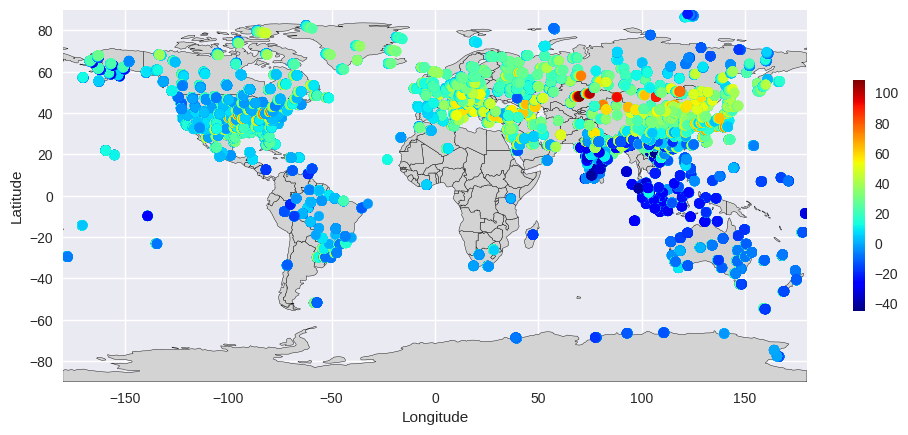

In [15]:
param = 'obs'

gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')

To save the figure, define its name (`figname`) and execute the following commands:

In [16]:
figname = varName + '_' + param + '_' + 'plot.png'

plt.tight_layout()
plt.savefig(figname)

<Figure size 800x550 with 0 Axes>

Generating the same figure, but considering various different types (`kx`) of the selected observation:

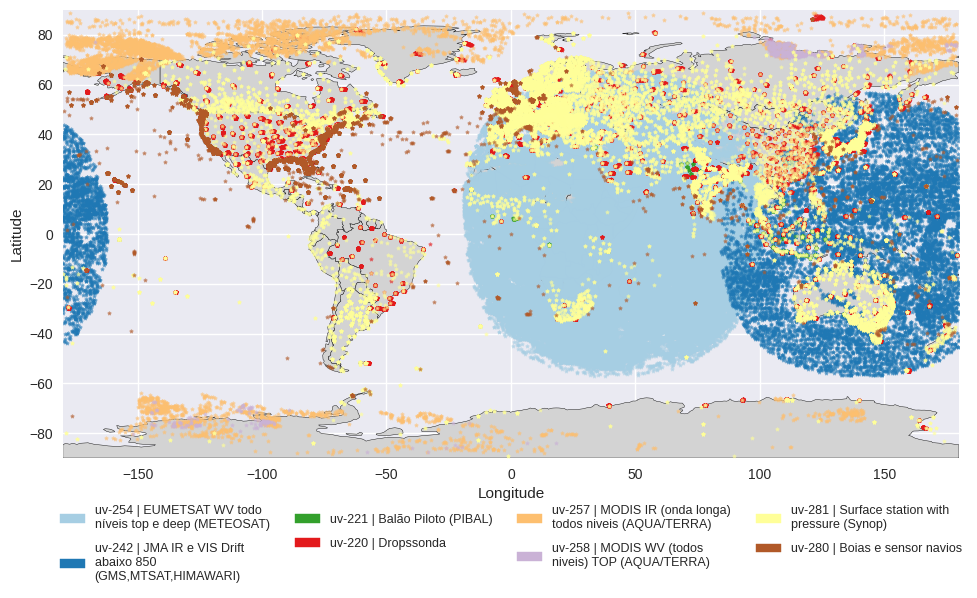

In [17]:
varTypes = [254,242,221,220,257,258,281,280]
idschar = '_'.join([str(item) for item in varTypes])

gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes)

figname = varName + '_' + idschar + '_' + 'ptmap.png'

plt.tight_layout()
plt.savefig(figname)

Generating a figure with different variables, considering the mask `iuse==1`:

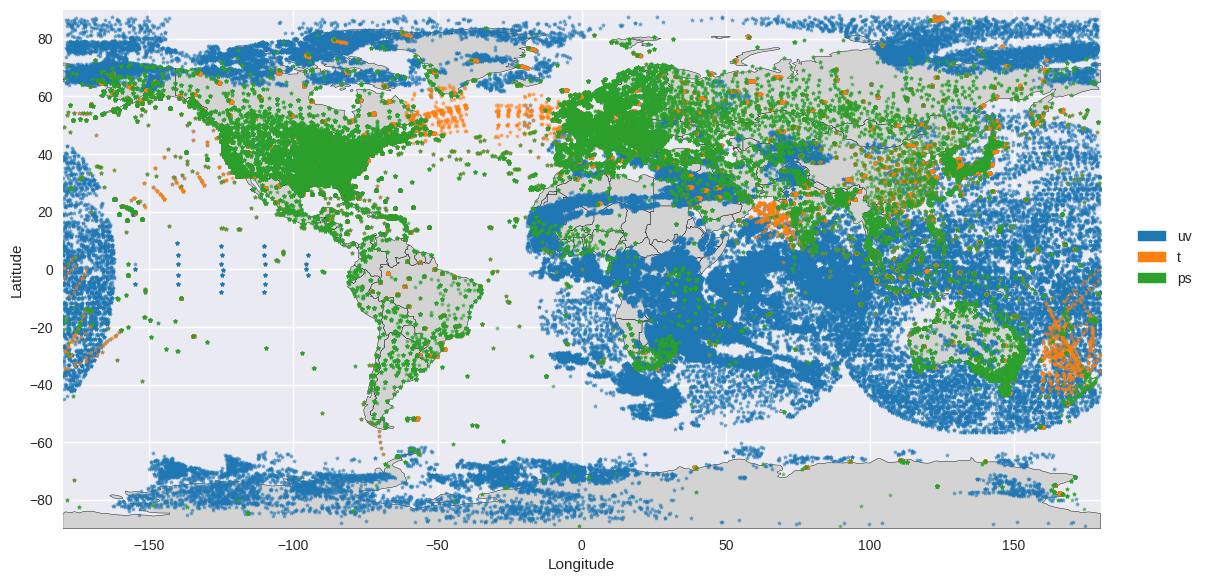

In [18]:
varNames = ['uv','ps','t']
idschar = '_'.join([str(item) for item in varNames])

gd.plot_diag.pvmap(gdf_list[tidx], varName=varNames, mask='iuse==1')

figname = idschar + '_pvmap.png'

plt.tight_layout()
plt.savefig(figname)

### Histogram

Use the `pcount()` function from the `plot_diag` class to obtain a histogram with the count of the number of observations for a specific variable:

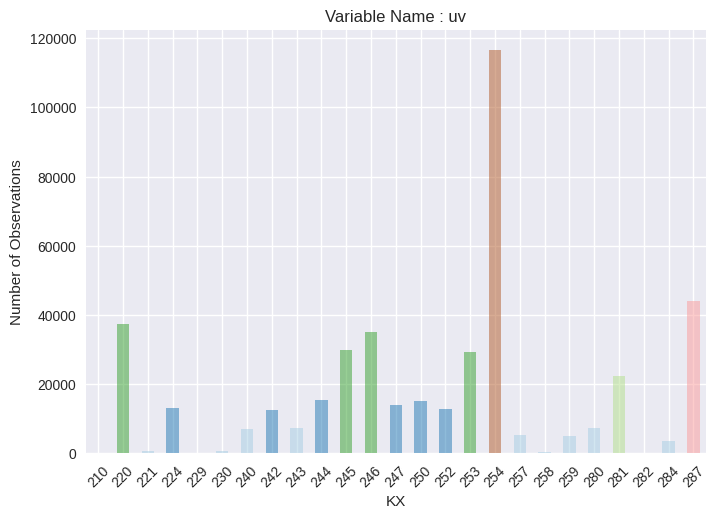

In [19]:
gd.plot_diag.pcount(gdf_list[tidx], varName)

Use the `vcount()` function from the `plot_diag` class to obtain a histogram with the count of the number of observations for all types of variables:

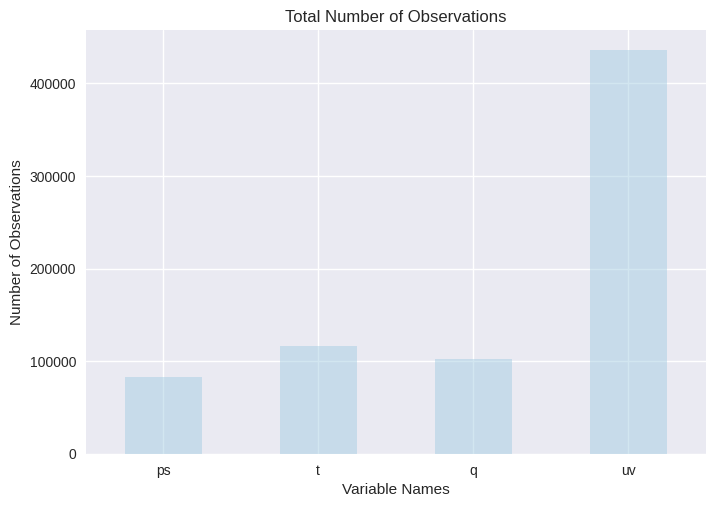

In [20]:
gd.plot_diag.vcount(gdf_list[tidx])

Similarly, use the `kxcount()` function from the `plot_diag` class to obtain a histogram with the count of the number of observations per type:

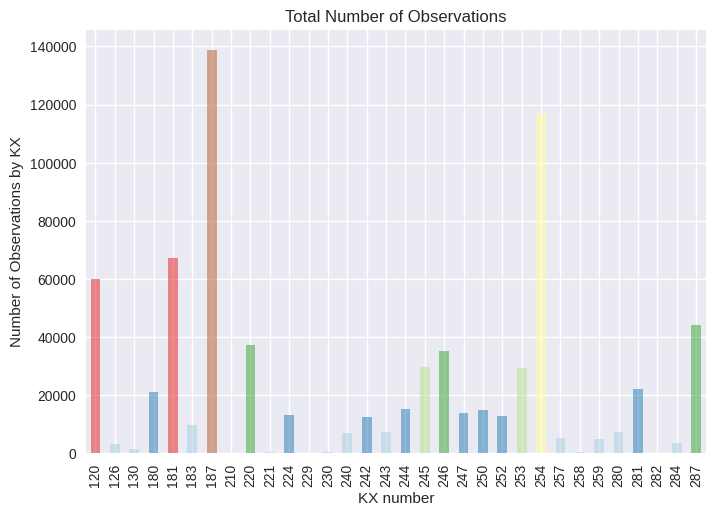

In [21]:
gd.plot_diag.kxcount(gdf_list[tidx])

### Time Series

<a id='time_series'></a>
Below are the options for figures using the `time_series()` function, included in the `plot_diag` class. Initially, a figure is generated with the parameters already set in this section. Figures are then presented by changing the `Level`, `Lay`, and `SingleL` parameters.

Plotting a time series for OmA and OmF:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00  - Level:  1000
 Preparing data for: 2019-12-10:06  - Level:  1000
 Preparing data for: 2019-12-10:12  - Level:  1000
 Preparing data for: 2019-12-10:18  - Level:  1000
 Preparing data for: 2019-12-11:00  - Level:  1000
 Preparing data for: 2019-12-11:06  - Level:  1000
 Preparing data for: 2019-12-11:12  - Level:  1000
 Preparing data for: 2019-12-11:18  - Level:  1000


 Calculating for 2019-12-10:00
 Calculating for 2019-12-10:06
 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

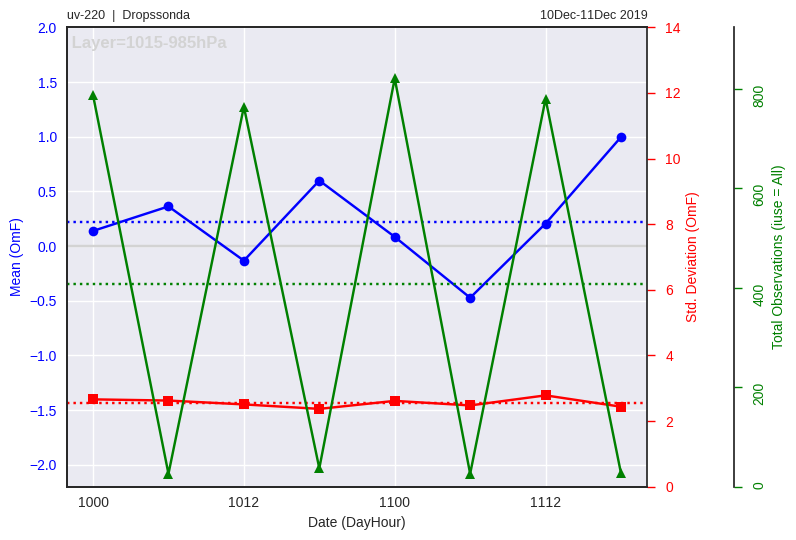

<Figure size 600x400 with 0 Axes>

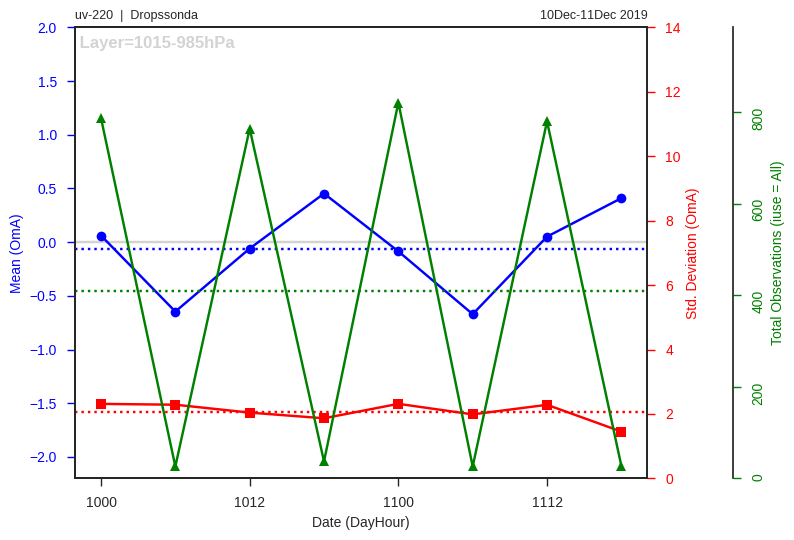

<Figure size 600x400 with 0 Axes>

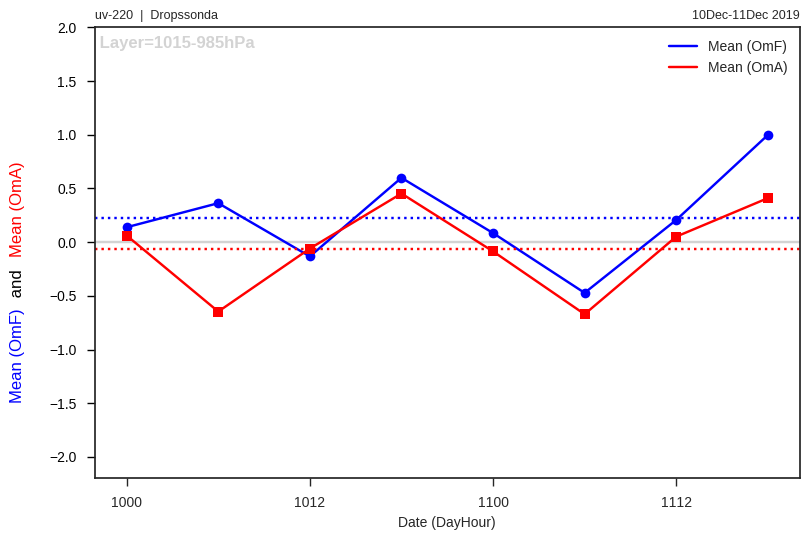

<Figure size 600x400 with 0 Axes>

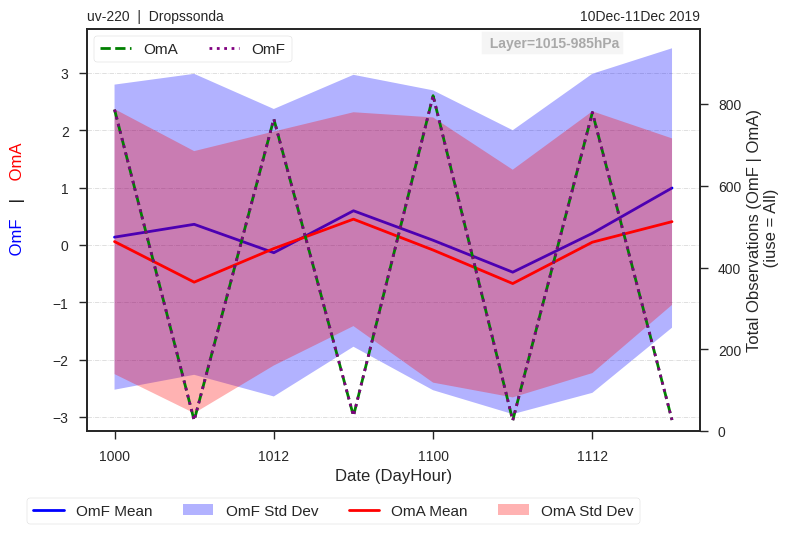

In [22]:
gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

In the previous case, the `Level` parameter was fixed at 1000 hPa with `SingleL` equal to `All`, meaning that the entire atmosphere was considered as a single layer, and the value 1000 hPa serves as a flag to indicate that there is no variation in height. Even with `Level=1000`, you can use `SingleL='OneL'` for a single layer around the `Level` value, in this case, 1000 hPa, varying between `Level-Lay` and `Level+Lay` (in the variable definition, `Lay` was fixed at 15 hPa; in case it is `None`, the default value of 50 hPa is used).


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00  - Level:  1000
 Preparing data for: 2019-12-10:06  - Level:  1000
 Preparing data for: 2019-12-10:12  - Level:  1000
 Preparing data for: 2019-12-10:18  - Level:  1000
 Preparing data for: 2019-12-11:00  - Level:  1000
 Preparing data for: 2019-12-11:06  - Level:  1000
 Preparing data for: 2019-12-11:12  - Level:  1000
 Preparing data for: 2019-12-11:18  - Level:  1000


 Calculating for 2019-12-10:00
 Calculating for 2019-12-10:06
 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

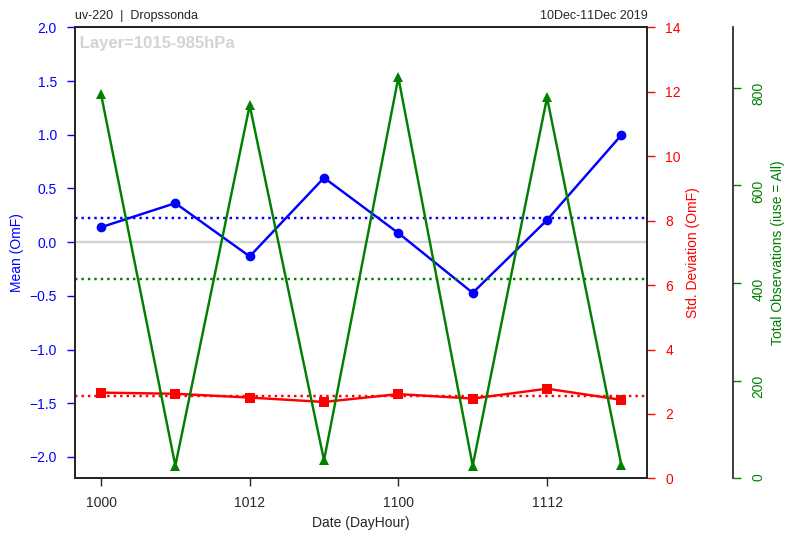

<Figure size 600x400 with 0 Axes>

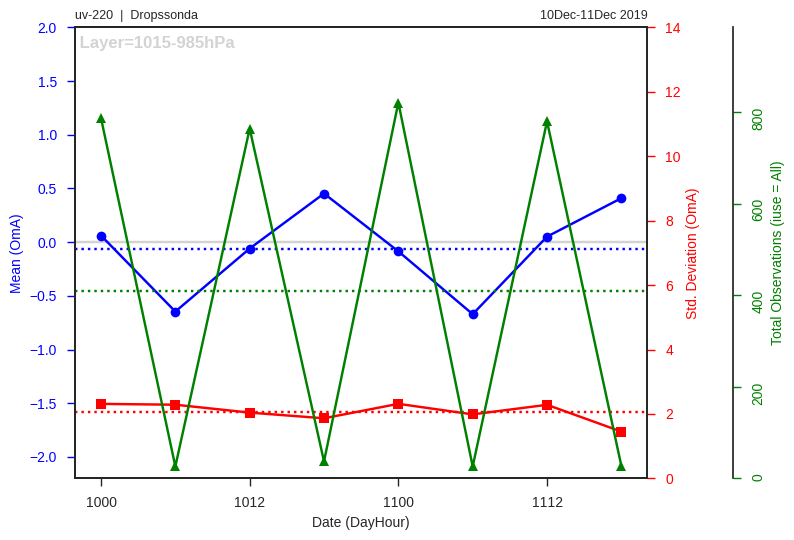

<Figure size 600x400 with 0 Axes>

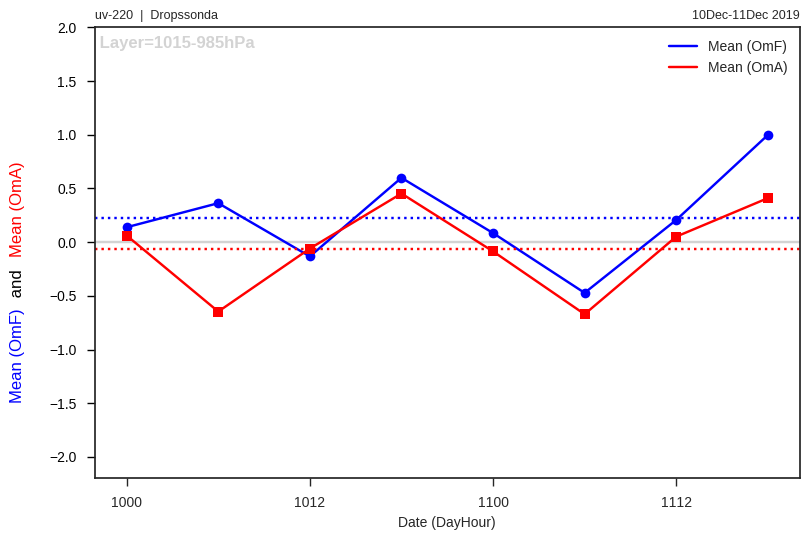

<Figure size 600x400 with 0 Axes>

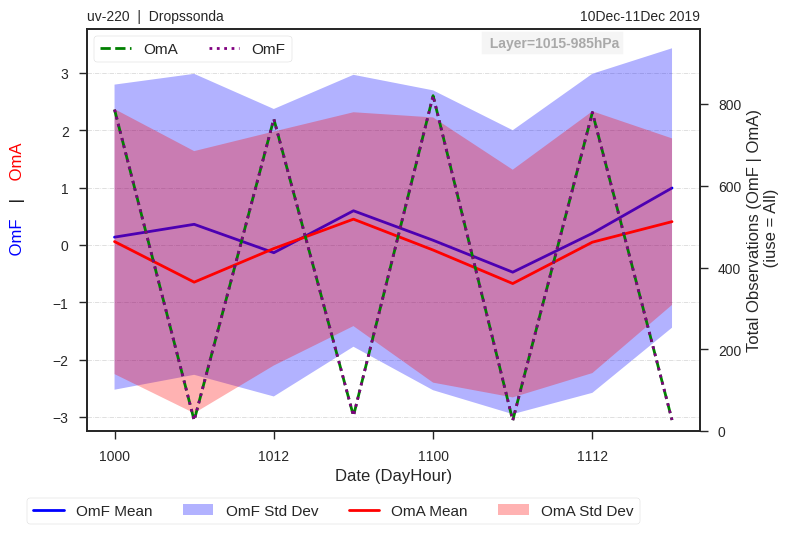

In [23]:
SingleL = 'OneL'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Notice how in the example above, the amount of data decreases since now a layer between 1015 and 985 hPa is being used.

Now, let's change it to not fix it at a single level or layer, i.e., change the `Level` variable to `None` or `Zlevs`. The `None` option looks for data at each level existing in the files and creates the plot for all these levels, but the values on the y-axis (ordinate) are only for the standard levels. It's important to clarify that the so-called standard levels are defined in the `read_diag` class and can be accessed using the `zlevs` method as follows:

In [24]:
gdf_list[tidx].zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

This way, you can use the `Level='Zlevs'` parameter to produce a time series by levels:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:18
 Levels:  

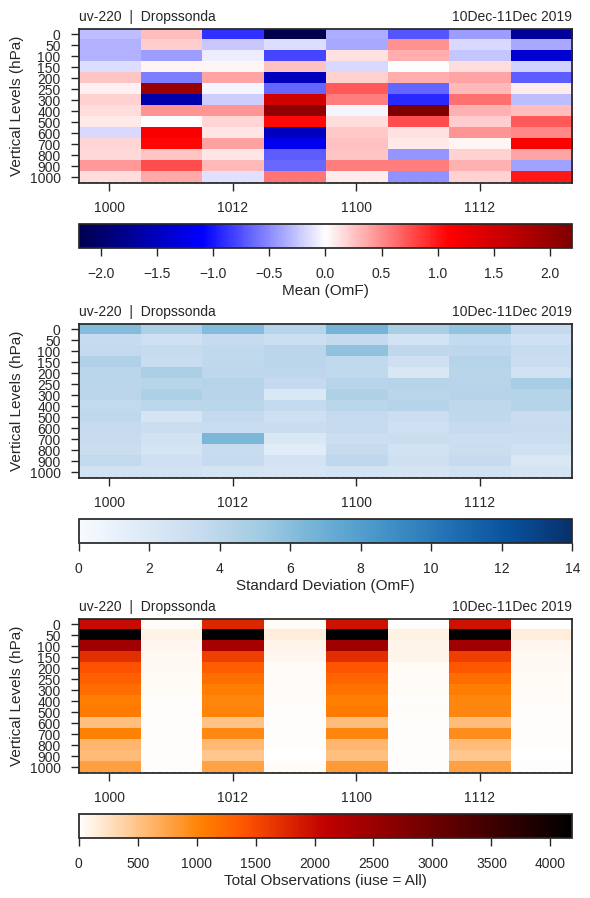

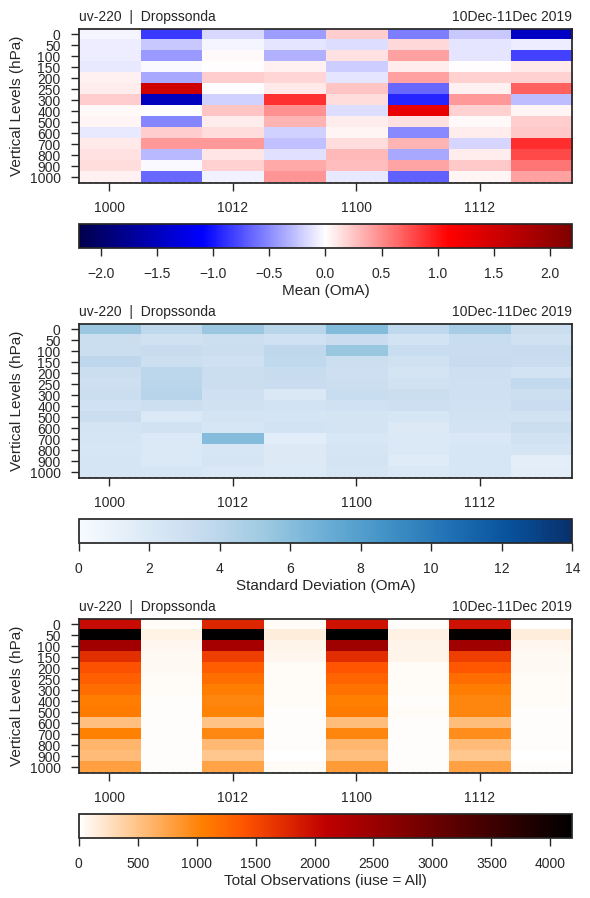

In [25]:
Level = 'Zlevs'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

If `Lay=None`, then the layers are filled, varying between the mean value considering the lower and upper layers. For example, for the 700 hPa level, a layer is constructed between 750 and 650 hPa, since the lower and upper levels are 800 and 600 hPa, respectively. For the 1000 hPa level, the layer varies between 1050 and 950 hPa.

The same previous example, but considering `Level='Zlevs'`:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:18
 Levels:  

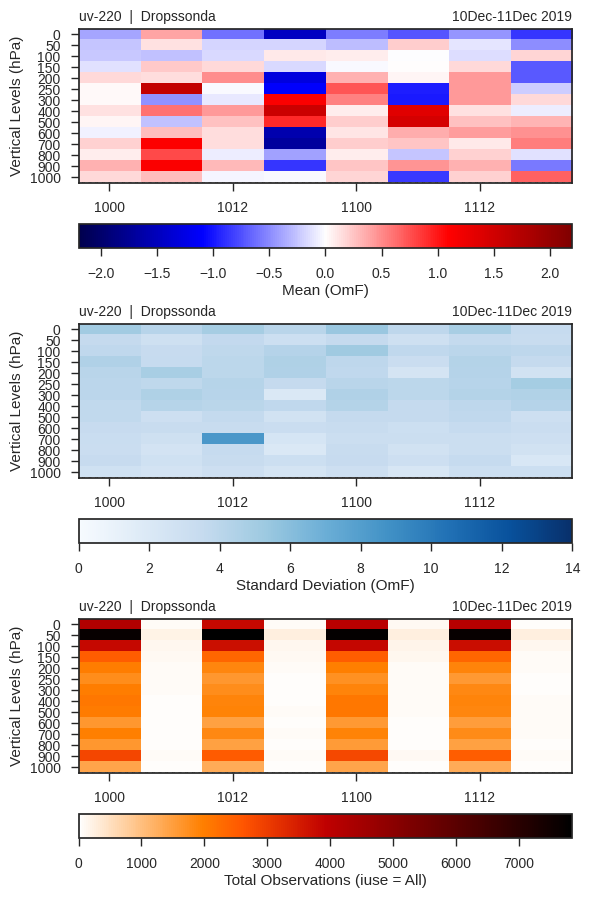

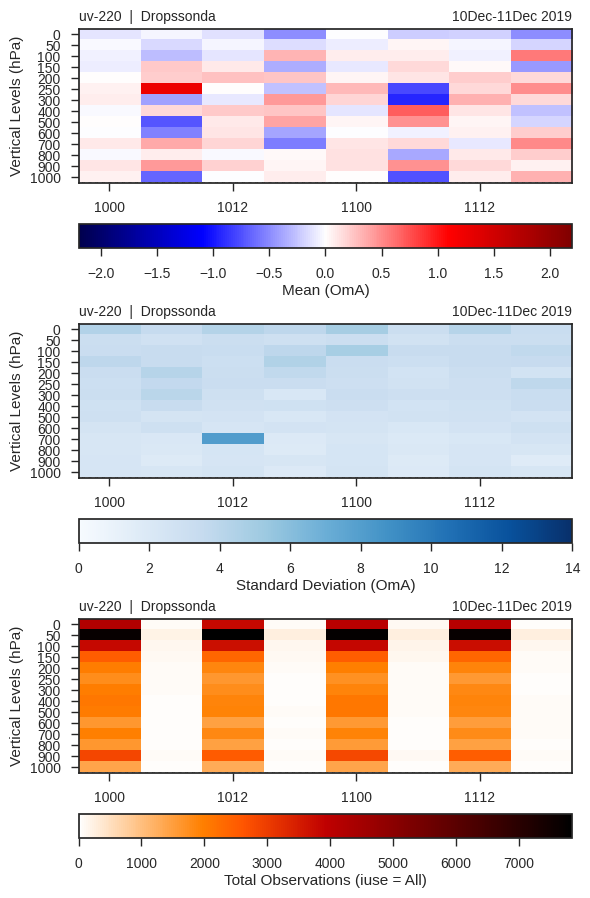

In [26]:
Level = 'Zlevs'
Lay = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finally, there is the option to consider all levels, i.e., `Level=None`. This option brings some difficulty in visualizing the information in the figure due to the large number of levels and distribution of data across all levels:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00
 Levels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

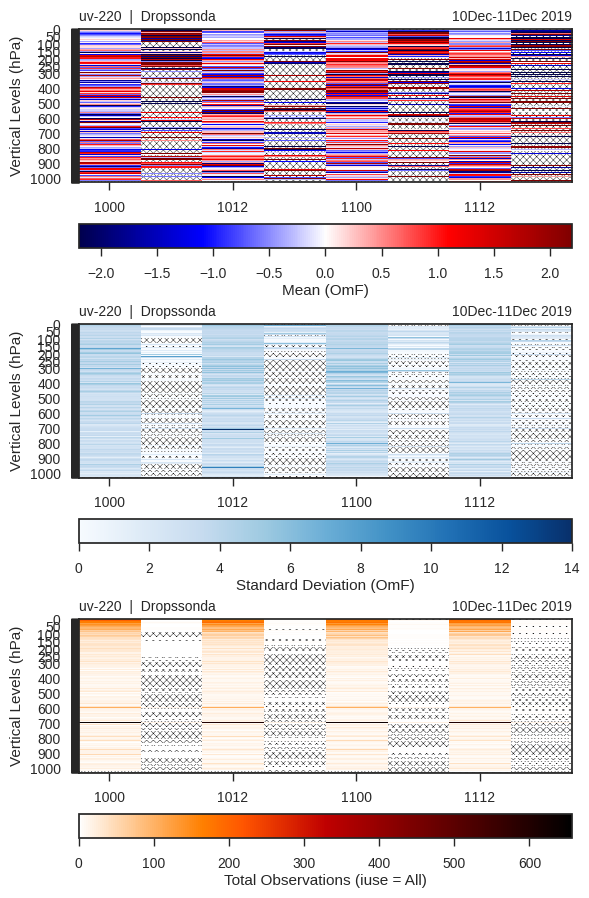

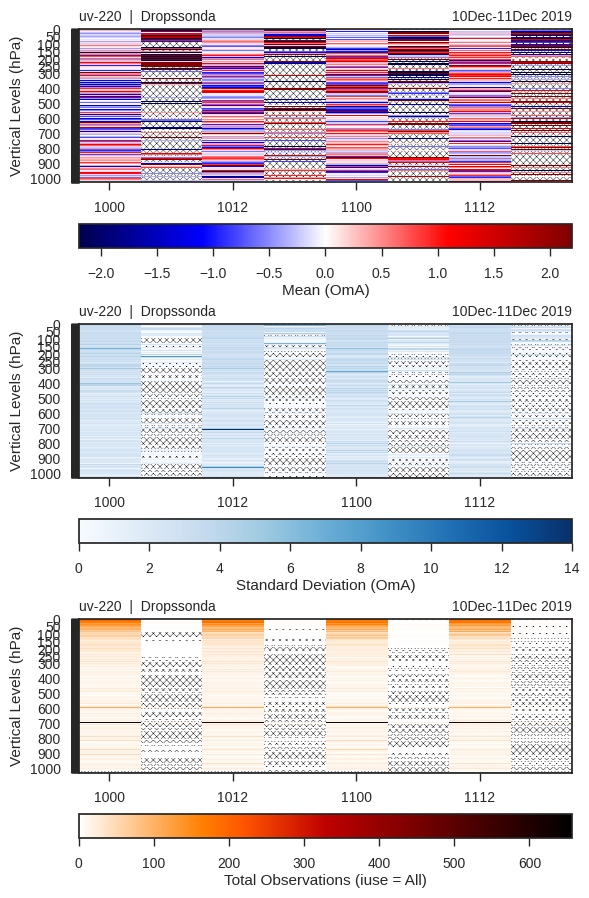

In [27]:
Level = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

After finishing the use of the files, close them to release the used memory:

In [28]:
for file in gdf_list:
    file.close()

The `readDiag` is an actively developing package with continuous updates. New features will be added and demonstrated through this notebook.